# Student information
* Name: Hoang Tuan Tu
* Student ID: 21000709
* Class: K66A2

# Import nessesary library

In [20]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import gzip
import matplotlib.pyplot as plt
import random
from scipy import sparse
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
from sklearn.naive_bayes import GaussianNB

* Reading data

In [21]:
data_path = "C:\HoangTu\Programing\\University\ML\PCA\digit\data"
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

* Define function

In [22]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data

    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
        # change images data to type of vector 28x28 dimentional
        images = images.reshape(num_images, image_size * image_size)
    return images, labels

def get_image(image):
    return image.reshape(28, 28)  

def convert_labels(y, C):
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

* Check image

In [23]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

C:\Users\Hoang Tu\AppData\Local\Temp\ipykernel_14772\1400660986.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)
(10000, 784) (10000,)


* Show 2 random image

5 5


<Figure size 640x480 with 0 Axes>

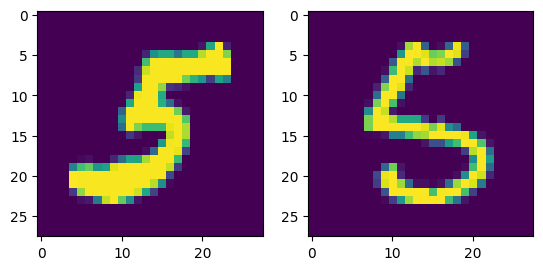

In [24]:
index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

(785, 5000)
(10, 5000)


<Figure size 640x480 with 0 Axes>

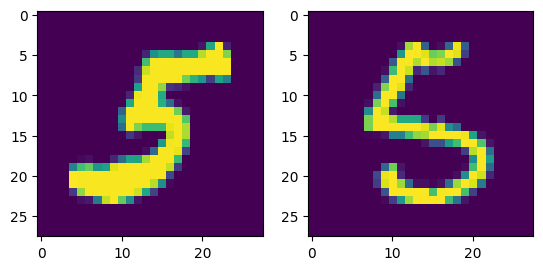

In [25]:
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T),axis = 0)

Y_train = convert_labels(train_labels, 10)
print(X_train.shape)
print(Y_train.shape)
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

# Phan 1

In [26]:
model = PCA()
X = StandardScaler().fit_transform(X_train)
result = model.fit_transform(X)

pc1 = - result[:,0]
pc2 = - result[:,1]

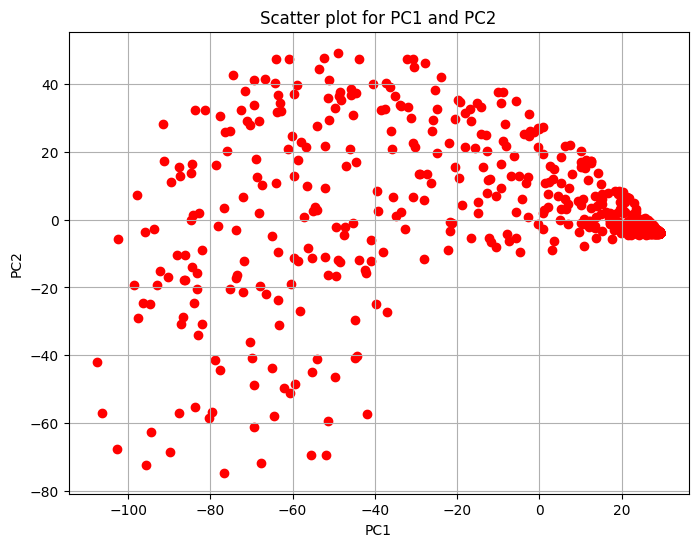

In [27]:
# Draw a chart
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c='r')  # Color red with transparency 0.5
plt.title('Scatter plot for PC1 and PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Phan 2

In [28]:
# Split the data into training and validation sets
train_labels = np.array([train_labels])
X_train, X_val, Y_train, Y_val = train_test_split(train_images, train_labels.T, test_size=0.3, random_state=42)

In [29]:
# Initialize the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model and measure the runtime
start_time = time.time()
model.fit(X_train, Y_train)
training_time = time.time() - start_time

C:\Users\Hoang Tu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hoang Tu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Predict labels for the validation set
predictions = model.predict(X_val)
# Evaluate accuracy on the validation set
accuracy = accuracy_score(Y_val, predictions)

* Print out result

In [31]:
print("Accuracy on validation set:", accuracy)
print("Training time:", training_time, "seconds")

Accuracy on validation set: 0.8886666666666667
Training time: 6.9447996616363525 seconds


# Phan 3

## a Reduce the dimensionality of the original training data to 100 dimensions

In [32]:
pca = PCA(n_components=100)
X_train_pca_a = pca.fit_transform(X_train)
X_val_pca_a = pca.transform(X_val)

* Train the model on the reduced-dimensional data and evaluate the results

In [33]:
start_time = time.time()
model_a = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_a.fit(X_train_pca_a, Y_train)
training_time_a = time.time() - start_time
accuracy_a = model_a.score(X_val_pca_a, Y_val)

C:\Users\Hoang Tu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hoang Tu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Print the results

In [34]:
print("Method a):")
print("Accuracy on validation set:", accuracy_a)
print("Training time:", training_time_a, "seconds")

Method a):
Accuracy on validation set: 0.8246666666666667
Training time: 1.6420280933380127 seconds


## b Reduce the dimensionality of each image in the training and validation sets to 100 dimensions

In [35]:
X_train_pca_b = pca.fit_transform(X_train)
X_val_pca_b = pca.transform(X_val)


* Train the model on the reduced-dimensional training set and evaluate the results

In [36]:
start_time = time.time()
model_b = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_b.fit(X_train_pca_b, Y_train)
training_time_b = time.time() - start_time
accuracy_b = model_b.score(X_val_pca_b, Y_val)

C:\Users\Hoang Tu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hoang Tu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Print Result

In [37]:
print("\nMethod b):")
print("Accuracy on validation set:", accuracy_b)
print("Training time:", training_time_b, "seconds")


Method b):
Accuracy on validation set: 0.82
Training time: 1.5038607120513916 seconds


# Phan 4

## Train the model on the original data and evaluate the results

In [38]:

model_nb_a = GaussianNB()
model_nb_a.fit(X_train, Y_train)
accuracy_a = model_nb_a.score(X_val, Y_val)

C:\Users\Hoang Tu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Print the results

In [39]:
print("Using original data:")
print("Accuracy on validation set:", accuracy_a)

Using original data:
Accuracy on validation set: 0.6186666666666667


## Train the model on the dimensionality-reduced data and evaluate the results

In [40]:
model_nb_b = GaussianNB()
model_nb_b.fit(X_train_pca_b, Y_train)
accuracy_b = model_nb_b.score(X_val_pca_b, Y_val)

C:\Users\Hoang Tu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Print result

In [41]:
print("\nUsing dimensionality-reduced data:")
print("Accuracy on validation set:", accuracy_b)


Using dimensionality-reduced data:
Accuracy on validation set: 0.8713333333333333
